* **Author :** Ruchit Vithani
* **ID :** 201701070
* **IT416 Topics in Deep Learning :** Lab 1 
* **Date :** 09-02-2020

# Import libraries

In [ ]:
import tensorflow as tf
import math as m
import matplotlib.pyplot as plt

# Question 1

Let $N = $ Number of terms to take in the series (In this case $N = {20, 50, 100}$)

The function we want to calculate is : $f(x) = \dfrac{2}{\pi}\bigg[1 - \sum_{n=0}^{\infty}\bigg\{\dfrac{1 + (-1)^n}{n^2 + 1}cos(nx)\bigg\}\bigg]$

* Calculation of numerator  $\{ (1 + (-1)^n)*cos(nx) \}$: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; This is calculated using  $ t1 = $ float tensot of 1's <br> 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;$t2 = $ float tensor representing $(-1)^n$ and <br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;$cos\_nx = $ A 2D tensor representing $cos(nx)$ for each value of $x \in \{0, \pi\}$ for each $n$. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After this basic calculation, obtain the numerator using following operation 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Numerator = $(t1 + t2) * cos\_nx$

* Calculation of denominator : 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Denominator $t3 = n^2 + 1$ 

* Calculating sum :

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Calculate the sum of $\dfrac{Numerator}{Denominator} = \dfrac{(t1 + t2)*cos\_nx}{t3}$ using `tf.reduce_sum`

The final value of the function would be $\dfrac{2}{\pi}\bigg[1-sum \bigg]$





In [ ]:
def f1(N):

    # n lies between [2, N] and x lies between [0, pi]
    n = tf.range(2, N+1, 1, dtype=tf.float64)
    x = tf.range(0, m.pi+0.1, 0.1, dtype=tf.float64)

    # calculation of numerator 
    t1 = tf.ones([N-1], dtype=tf.float64)
    t2 = (-1.0*t1)**n

    x = tf.expand_dims(x, axis=1)
    n = tf.expand_dims(n, axis=0)
    cos_nx = tf.cos(tf.matmul(x,n))

    # Calculation of denominator
    t3 = (n**2) + 1


    # Final calculation of series
    t4 = (t1 + t2)/t3    
    ser = t4*cos_nx
    ser = tf.reduce_sum(ser, axis=1)
    ser = 1 - ser
    ser = 2*ser
    ser = ser/m.pi
    
    return ser

In [ ]:
# Helper function to plot the series f(x)
def plot(ser):
    plt.figure()
    plt.plot(tf.range(0, 3.15, 0.1), ser[:-1])
    plt.show()

# Printing f(x) for x=1 and for N = 20, 50, 100

(N, x) = (20, 1) ===> f(x) = 0.7645009747324029
(N, x) = (50, 1) ===> f(x) = 0.7657823850497456
(N, x) = (100, 1) ===> f(x) = 0.765938789511261


# Plotting f(x) for x lying between [0, pi]



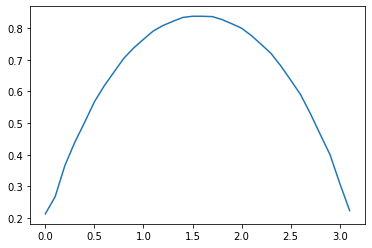

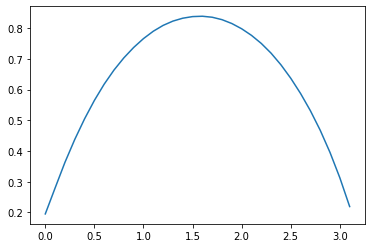

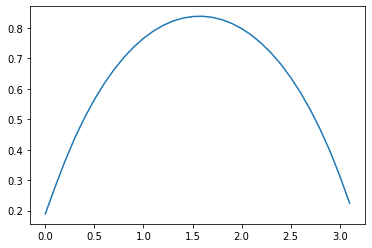

In [ ]:
N = 20
S1 = f1(N)

N = 50
S2 = f1(N)

N = 100
S3 = f1(N)

print("# Printing f(x) for x=1 and for N = 20, 50, 100\n")
print("(N, x) = ({}, 1) ===> f(x) = {}".format(20, S1[10]))
print("(N, x) = ({}, 1) ===> f(x) = {}".format(50, S2[10]))
print("(N, x) = ({}, 1) ===> f(x) = {}".format(100, S3[10]))


# Plotting f(x) for x lying between [0, pi]
print("\n\n# Plotting f(x) for x lying between [0, pi]\n")
plot(S1)
plot(S2)
plot(S3)

# Question 2

Function to be implemented : $f(x) = \sum_{n=0}^{\infty} \dfrac{(-1)^nx^{2n}}{2n!}$ 

* Calculating numerator is done as similar in question 1. 
* Denominator involves calculation of factorial, for which, I use tensorflow function `lgamma`, which is used to calculate log of factorial. Raising it to exponential gives us factorial of a number. 

In [ ]:
# Helper function to calculate factorial of a number using tensorflow function
def fact(n):
    return tf.exp(tf.math.lgamma(n + 1))

def f2(N, x):
    # n lies between [2, N]
    n = tf.range(0, N+1, 1, dtype=tf.float64)

    # Calculating numerator
    t1 = tf.ones([N+1], dtype=tf.float64)
    t1 = (-1*t1)**n
    t2 = t1*(x**(2*n))

    # Calculating function
    t3 = t2/fact(2*n)

    return tf.reduce_sum(t3)

In [ ]:
print("# Printing f(x) for various x's and N = {2, 5, 10} in question 2\n")
x = 0.5
a1 = f2(2, x)
a2 = f2(5, x)
a3 = f2(10, x)

print(" (N, x) = (2, 0.5) ===> f(x) = {}".format(a1))
print(" (N, x) = (5, 0.5) ===> f(x) = {}".format(a2))
print(" (N, x) = (10, 0.5) ===> f(x) = {}\n\n".format(a3))

x = 2
a1 = f2(2, x)
a2 = f2(5, x)
a3 = f2(10, x)

print(" (N, x) = (2, 2) ===> f(x) = {}".format(a1))
print(" (N, x) = (5, 2) ===> f(x) = {}".format(a2))
print(" (N, x) = (10, 2) ===> f(x) = {}\n\n".format(a3))

x = 10
a1 = f2(2, x)
a2 = f2(5, x)
a3 = f2(10, x)

print(" (N, x) = (2, 10) ===> f(x) = {}".format(a1))
print(" (N, x) = (5, 10) ===> f(x) = {}".format(a2))
print(" (N, x) = (10, 10) ===> f(x) = {}\n\n".format(a3))


x = -2
a1 = f2(2, x)
a2 = f2(5, x)
a3 = f2(10, x)

print(" (N, x) = (2, -2) ===> f(x) = {}".format(a1))
print(" (N, x) = (5, -2) ===> f(x) = {}".format(a2))
print(" (N, x) = (10, -2) ===> f(x) = {}\n\n".format(a3))

# Printing f(x) for various x's and N = {2, 5, 10} in question 2

 (N, x) = (2, 0.5) ===> f(x) = 0.8776041666666666
 (N, x) = (5, 0.5) ===> f(x) = 0.8775825618898638
 (N, x) = (10, 0.5) ===> f(x) = 0.8775825618903726


 (N, x) = (2, 2) ===> f(x) = -0.3333333333333335
 (N, x) = (5, 2) ===> f(x) = -0.41615520282186974
 (N, x) = (10, 2) ===> f(x) = -0.41614683654713874


 (N, x) = (2, 10) ===> f(x) = 367.66666666666663
 (N, x) = (5, 10) ===> f(x) = -1296.7954144620762
 (N, x) = (10, 10) ===> f(x) = 6.664564337751301


 (N, x) = (2, -2) ===> f(x) = -0.3333333333333335
 (N, x) = (5, -2) ===> f(x) = -0.41615520282186974
 (N, x) = (10, -2) ===> f(x) = -0.41614683654713874




# Question 3 

Similar implementation as question 1 and question 2. There is no new functionality in this function other than those in questions 1 and 2. 

In [ ]:
def f3(N, x):
    # n lies between [2, N]
    n = tf.range(0, 2*N+1, 1, dtype=tf.float64)

    t1 = fact(2*n)
    t2 = (4**n)*(fact(n)**2)*(2*n + 1)

    ser = (t1/t2)*(x**(2*n+1))
    return tf.reduce_sum(ser)

In [ ]:
print("# Printing f(x) for various x's and N = {2, 5, 10} in question 2\n")
x = 0.5
a1 = f3(2, x)
a2 = f3(5, x)
a3 = f3(10, x)

print(" (N, x) = (2, 0.5) ===> f(x) = {}".format(a1))
print(" (N, x) = (5, 0.5) ===> f(x) = {}".format(a2))
print(" (N, x) = (10, 0.5) ===> f(x) = {}\n\n".format(a3))

x = 2
a1 = f3(2, x)
a2 = f3(5, x)
a3 = f3(10, x)

print(" (N, x) = (2, 2) ===> f(x) = {}".format(a1))
print(" (N, x) = (5, 2) ===> f(x) = {}".format(a2))
print(" (N, x) = (10, 2) ===> f(x) = {}\n\n".format(a3))

x = 10
a1 = f3(2, x)
a2 = f3(5, x)
a3 = f3(10, x)

print(" (N, x) = (2, 10) ===> f(x) = {}".format(a1))
print(" (N, x) = (5, 10) ===> f(x) = {}".format(a2))
print(" (N, x) = (10, 10) ===> f(x) = {}\n\n".format(a3))


x = -2
a1 = f3(2, x)
a2 = f3(5, x)
a3 = f3(10, x)

print(" (N, x) = (2, -2) ===> f(x) = {}".format(a1))
print(" (N, x) = (5, -2) ===> f(x) = {}".format(a2))
print(" (N, x) = (10, -2) ===> f(x) = {}\n\n".format(a3))

# Printing f(x) for various x's and N = {2, 5, 10} in question 2

 (N, x) = (2, 0.5) ===> f(x) = 0.5235851953900049
 (N, x) = (5, 0.5) ===> f(x) = 0.5235987744792602
 (N, x) = (10, 0.5) ===> f(x) = 0.5235987755982985


 (N, x) = (2, 2) ===> f(x) = 27.003174603174607
 (N, x) = (5, 2) ===> f(x) = 24900.39711028556
 (N, x) = (10, 2) ===> f(x) = 9210971677.884111


 (N, x) = (2, 10) ===> f(x) = 30836049.68253969
 (N, x) = (5, 10) ===> f(x) = 8.489121225637777e+18
 (N, x) = (10, 10) ===> f(x) = 3.091153088677033e+38


 (N, x) = (2, -2) ===> f(x) = -27.003174603174607
 (N, x) = (5, -2) ===> f(x) = -24900.39711028556
 (N, x) = (10, -2) ===> f(x) = -9210971677.884111


